# Project 2
- Submitted by: Yiang Yuet Meng


#### The coding will be using the below listed stages:
##### 1 - Data Importing
##### 2 - Data Cleaning
##### 3 - Data Exploratory Analysis
##### 4 - Modelling
##### 5 - Results
##### 6 - Conclusion
##### 7 - Recommendation



## Problem Statement
- I am working for auction house. Currently, I have a list of houses that are to be auctioned. 
- My task is to predict the sale price of the houses and present to my bosses and seek approval for the list of prices to serve as a base cost for the houses.

## Housing
- For this problem, use only 1 target output variable **price**
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

#### Background on Ames Housing dataset
##### - There is 2 datasets namely test.csv and train.csv
##### - The price column is the target variable.
##### - The rest of the variables are the features.
##### - We are supposed to evaluate and train a best model that use price as target variable and the rest of variables as input features. 
##### - We will then used the best trained model to predict price by plotting the actual price vs predicted price.

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,Lasso, LassoCV, Ridge,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from datetime import datetime


# 1- Data Importing

In [191]:
#import the dataset
housing_train= pd.read_csv('datasets/train.csv',sep=',')
housing_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [192]:
#import the test dataset
housing_test= pd.read_csv('datasets/test.csv',sep=',')
housing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [193]:
# To check for any missing values using sum
housing_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

## There are missing values from the train dataset.

In [194]:
# To check for any missing values using sum
housing_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

## There are missing values from the test dataset.

In [195]:
# Get datatype
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Summary of Ames Housing Dataset
- There are 11 variables that are float64, 26 variables are int64 and 42 variable is object data type.
- There are missing values.

## 2. Data Cleaning
- Fix missing values
- Lot Frontage - assign 0 to null values
- Mas Vnr Area- assign 0 to null values
- BsmtFin SF 1- assign 0 to null values
- BsmtFin SF 2 - assign 0 to null values
- Total Bsmt SF- assign 0 to null values
- Bsmt Full Bath- assign 0 to null values
- Bsmt Half Bath- assign 0 to null values
- Garage Yr Blt- assign 0 to null values
- Garage Cars - assign 0 to null values
- Garage Area - assign 0 to null values


#### The features are the following:
- SalesPrice: The property's sale price in dollars. This is the target variable to be predicted 
- MSSubClass: The building class
- MSZoning: Identifies the general zoning classification of the sale
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual:Exterior material quality
- ExterCond:Present condition of the material on the exterior
- Foundation:Type of foundation
- BsmtQual:Height of the basement
- BsmtCond::General condition of the basement
- BsmtExposure:Walkout or garden level basement walls
- BsmtFinType1:Quality of basement finished area
- BsmtFinSF1:Type 1 finished square feet
- BsmtFinType2:Quality of second finished area (if present)
- BsmtFinSF2:Type 2 finished square feet
- BsmtUnfSF:Unfinished square feet of basement area
- TotalBsmtSF:Total square feet of basement area
- Heating:Type of heating
- HeatingQC:Heating quality and condition
- CentralAir:Central air conditioning
- Electrical:Electrical system
- 1stFlrSF:First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale


In [196]:
housing_train['Lot Frontage'].fillna(0, inplace=True)
housing_train['Mas Vnr Area'].fillna(0, inplace=True)
housing_train['BsmtFin SF 1'].fillna(0, inplace=True)
housing_train['BsmtFin SF 2'].fillna(0, inplace=True)
housing_train['Total Bsmt SF'].fillna(0, inplace=True)
housing_train['Bsmt Full Bath'].fillna(0, inplace=True)
housing_train['Bsmt Half Bath'].fillna(0, inplace=True)
housing_train['Garage Yr Blt'].fillna(0, inplace=True)
housing_train['Garage Cars'].fillna(0, inplace=True)
housing_train['Garage Area'].fillna(0, inplace=True)
housing_train['Bsmt Unf SF'].fillna(0, inplace=True)



- To study the data types in the datase by calling dtype

In [197]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [198]:
# Read 'kc_house_data.csv' dataset statistics 
housing_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


- I consolidate all the bathrooms and store in a new filed 'baths'

In [199]:
# Consolidating bathrooms
baths = [x for x in housing_train.columns if 'Bath' in x]
housing_train['Total Baths'] = housing_train[baths].sum(axis=1)
housing_train.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

-  Square Feet: I add up the area of the houses into a single ‘total sq ft’ column. 

In [200]:
# Creating a new column of total square feet
housing_train['totalsqft'] = housing_train['Total Bsmt SF'] + housing_train['Gr Liv Area'] + housing_train['Wood Deck SF']+ housing_train['Open Porch SF'] + housing_train['Enclosed Porch']+housing_train['3Ssn Porch'] +housing_train['Screen Porch']

- Is Remodelled: I introduced a new field to indicate that the house has been remodelled.

In [201]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'
housing_train['is_remodelled'] = np.where(housing_train['Year Remod/Add'] - housing_train['Year Built'] > 0, 1, 0)
housing_train.drop(['Year Remod/Add'], axis=1, inplace=True)

- Garage: I transformed the categorical ‘Garage Finish’ column into ‘Has Finished Garage’ and ‘Has Detached Garage’ using one-hot encoding to indicate finished vs unfinished garages. All remaining garage columns were dropped. 

In [202]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column
searchfor = 'Fin', 'RFn'
housing_train['has_finished_garage'] = np.where(housing_train['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)
housing_train['Detached Garage'] = np.where(housing_train['Garage Type'].str.contains('Detchd'), 1, 0)
housing_train.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

- Basement: There were multiple categorical columns describing type of basement finish, so I converted these into a one-hot encoded ‘Has Finished Basement’ column and dropped the originals.

In [203]:
# Consolidating basement columns into 'Has Finished Basement'

lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'

housing_train['Has Finished Basement'] = np.where(housing_train['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
housing_train['Has Finished Basement'] = np.where(housing_train['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)

-  ‘Pool QC’ changed to ‘Has Pool’

In [204]:
# Pool
housing_train['has_pool'] = np.where(housing_train['Pool QC'].str.contains('NA'), 0, 1)
housing_train.drop(['Pool QC'], axis=1, inplace=True)

-  ‘Fence’ changed to ‘Has Fence’

In [205]:
# Fence
housing_train['has_fence'] = np.where(housing_train['Fence'].str.contains('NA'), 0, 1)
housing_train.drop(['Fence'], axis=1, inplace=True)

-  ‘Paved Drive’ changed to ‘Has Paved Drive’

In [206]:
# Paved Drive
housing_train['has_paved_drive'] = np.where(housing_train['Paved Drive'].str.contains('N'), 0, 1)
housing_train.drop(['Paved Drive'], axis=1, inplace=True)

-  ‘Central Air’ changed to ‘Has Central Air’

In [207]:
# Central Air
housing_train['has_central_air'] = np.where(housing_train['Central Air'].str.contains('N'), 0, 1)
housing_train.drop(['Central Air'], axis=1, inplace=True)

- A number of categorical variables were transformed into dummy columns:
- 'Lot Config'
- 'MS Zoning'
- 'Misc Feature'
- 'Neighbourhood'
- 'House Style'
- 'Bldg Type'

In [208]:
# Created dummy columns
housing_train = pd.get_dummies(housing_train, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 
                                   'House Style', 'Bldg Type','Neighborhood'], drop_first=True)

- Transform the categorical quality ranging to ordinal ones

In [209]:
# Quality rankings - transforming categorical vairables to ordinal ones
cols = ['Bsmt Qual', 'Bsmt Cond', 'Fireplace Qu', 'Heating QC','Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    housing_train[x] = housing_train[x].map(lambda x: rankings.get(x, x))
    
    
housing_train['Fireplace Qu'].fillna(0, inplace=True)
housing_train['Bsmt Qual'].fillna(0, inplace=True)
housing_train['Bsmt Cond'].fillna(0, inplace=True)

selection = housing_train.loc[:6,'Exter Qual':'Bsmt Cond']
print(selection)
selection = housing_train.loc[:6,'Fireplace Qu':'Garage Cond']
print(selection)

   Exter Qual  Exter Cond Foundation  Bsmt Qual  Bsmt Cond
0           4           3     CBlock        3.0        3.0
1           4           3      PConc        4.0        3.0
2           3           4     CBlock        3.0        3.0
3           3           3      PConc        4.0        3.0
4           3           3      PConc        2.0        4.0
5           4           3     CBlock        3.0        3.0
6           3           3      PConc        4.0        3.0
   Fireplace Qu  Garage Cars  Garage Area  Garage Qual  Garage Cond
0           0.0          2.0        475.0          3.0          3.0
1           3.0          2.0        559.0          3.0          3.0
2           0.0          1.0        246.0          3.0          3.0
3           0.0          2.0        400.0          3.0          3.0
4           0.0          2.0        484.0          3.0          3.0
5           4.0          2.0        578.0          3.0          3.0
6           0.0          2.0        525.0          3

- Year Built: I chose to convert this year column into ‘Age,’ as a way of addressing the nebulous relationship between year as a point in time, and year as a number.

In [210]:
# Turning the 'Year Built' column into 'Age'
now = datetime.now()
housing_train['current_year'] = now.year
housing_train['age'] = housing_train['current_year'] - housing_train['Year Built']
housing_train.drop(['current_year', 'Year Built', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

- Export the dataset to csv to review what are the fields (non-numeric or redundant) to be removed

In [211]:
housing_train.to_csv('datasets/housing_train.csv', index=False)

- I created a variable to account for area size. Thus, I remove the fields on areas size who are 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'.

- Street, Alley, LotShape and LandContour, Land Slope are external to the house.I consider not so significant in Sale Price of house
- Electical and Utilities are not so significant in determining the price of House. So these are removed
- I have introduced a field called "Heating QC" . Heating field is closely related to this field. Thus, the field Heating is removed
- There is a variable "External Quality". Thus, Roof Style, Roof Matl, Exterior lst and Exterior 2nd are removed
- Sale Type is not significant in the Sale Price. Thus I removed it

In [212]:
housing_train.drop(['Street', 'Alley','Lot Shape','Land Contour','Electrical','Utilities','Land Slope','Condition 1','Condition 2','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Functional','Sale Type','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2'], axis=1, inplace=True)
housing_train['Fireplace Qu'].fillna(0, inplace=True)
housing_train['Bsmt Qual'].fillna(0, inplace=True)
housing_train['Bsmt Cond'].fillna(0, inplace=True)
housing_train['Mas Vnr Area'].fillna(0, inplace=True)
housing_train.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'], axis=1, inplace=True)
housing_train.to_csv('datasets/housing_train.csv', index=False)

In [213]:
# Consolidating bathrooms
baths = [x for x in housing_test.columns if 'Bath' in x]
housing_test['Total Baths'] = housing_test[baths].sum(axis=1)
housing_test.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

In [214]:
# Creating a new column of total square feet
housing_test['totalsqft'] = housing_test['Total Bsmt SF'] + housing_test['Gr Liv Area'] + housing_test['Wood Deck SF']+ housing_test['Open Porch SF'] + housing_test['Enclosed Porch']+housing_test['3Ssn Porch'] +housing_test['Screen Porch']

In [215]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'
housing_test['is_remodelled'] = np.where(housing_test['Year Remod/Add'] - housing_test['Year Built'] > 0, 1, 0)
housing_test.drop(['Year Remod/Add'], axis=1, inplace=True)

In [216]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column
searchfor = 'Fin', 'RFn'
housing_test['has_finished_garage'] = np.where(housing_test['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)
housing_test['Detached Garage'] = np.where(housing_test['Garage Type'].str.contains('Detchd'), 1, 0)
housing_test.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

In [217]:
# Consolidating basement columns into 'Has Finished Basement'
lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'
housing_test['Has Finished Basement'] = np.where(housing_test['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
housing_test['Has Finished Basement'] = np.where(housing_test['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)

In [218]:
# Pool
housing_test['has_pool'] = np.where(housing_test['Pool QC'].str.contains('NA'), 0, 1)
housing_test.drop(['Pool QC'], axis=1, inplace=True)

In [219]:
# Fence
housing_test['has_fence'] = np.where(housing_test['Fence'].str.contains('NA'), 0, 1)
housing_test.drop(['Fence'], axis=1, inplace=True)

In [220]:
# Paved Drive
housing_test['has_paved_drive'] = np.where(housing_test['Paved Drive'].str.contains('N'), 0, 1)
housing_test.drop(['Paved Drive'], axis=1, inplace=True)

In [221]:
# Central Air
housing_test['has_central_air'] = np.where(housing_test['Central Air'].str.contains('N'), 0, 1)
housing_test.drop(['Central Air'], axis=1, inplace=True)

In [222]:
# Created dummy columns
housing_test = pd.get_dummies(housing_test, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 
                                   'House Style', 'Bldg Type','Neighborhood'], drop_first=True)

In [223]:
# Quality rankings - transforming categorical vairables to ordinal ones
cols = ['Bsmt Qual', 'Bsmt Cond', 'Fireplace Qu', 'Heating QC','Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual', 'Exter Qual', 'Exter Cond']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    housing_test[x] = housing_test[x].map(lambda x: rankings.get(x, x))

In [224]:
# Turning the 'Year Built' column into 'Age'
now = datetime.now()
housing_test['current_year'] = now.year
housing_test['age'] = housing_test['current_year'] - housing_test['Year Built']
housing_test.drop(['current_year', 'Year Built', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

In [225]:
housing_test.drop(['Street', 'Alley','Lot Shape','Land Contour','Electrical','Utilities','Land Slope','Condition 1','Condition 2','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Functional','Sale Type','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2'], axis=1, inplace=True)
housing_test['Fireplace Qu'].fillna(0, inplace=True)
housing_test['Bsmt Qual'].fillna(0, inplace=True)
housing_test['Bsmt Cond'].fillna(0, inplace=True)
housing_test['Bsmt Cond'].fillna(0, inplace=True)
housing_test['Mas Vnr Area'].fillna(0, inplace=True)
housing_test.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'], axis=1, inplace=True)

housing_test.to_csv('datasets/housing_test.csv', index=False)

# 3 - Exploratory Data Analysis

In [226]:
# Do a correction for numerical features and sort to determine the most important features relative to Price
corr = housing_train.corr()
corr = corr[abs(corr) >= 0.5]
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(50))

SalePrice                1.000000
Overall Qual             0.800207
totalsqft                0.784709
Exter Qual               0.712146
Kitchen Qual             0.692336
Garage Area              0.649897
Garage Cars              0.647781
Bsmt Qual                0.612188
Total Baths              0.609641
Fireplace Qu             0.538925
TotRms AbvGrd            0.504014
Mas Vnr Area             0.503579
age                     -0.571849
Id                            NaN
PID                           NaN
MS SubClass                   NaN
Lot Frontage                  NaN
Lot Area                      NaN
Overall Cond                  NaN
Exter Cond                    NaN
Bsmt Cond                     NaN
Heating QC                    NaN
Bedroom AbvGr                 NaN
Kitchen AbvGr                 NaN
Fireplaces                    NaN
Garage Qual                   NaN
Garage Cond                   NaN
Pool Area                     NaN
Misc Val                      NaN
is_remodelled 

Text(0.5, 1.0, 'Correlation Matrix: Ames Housing Data Set Variables ')

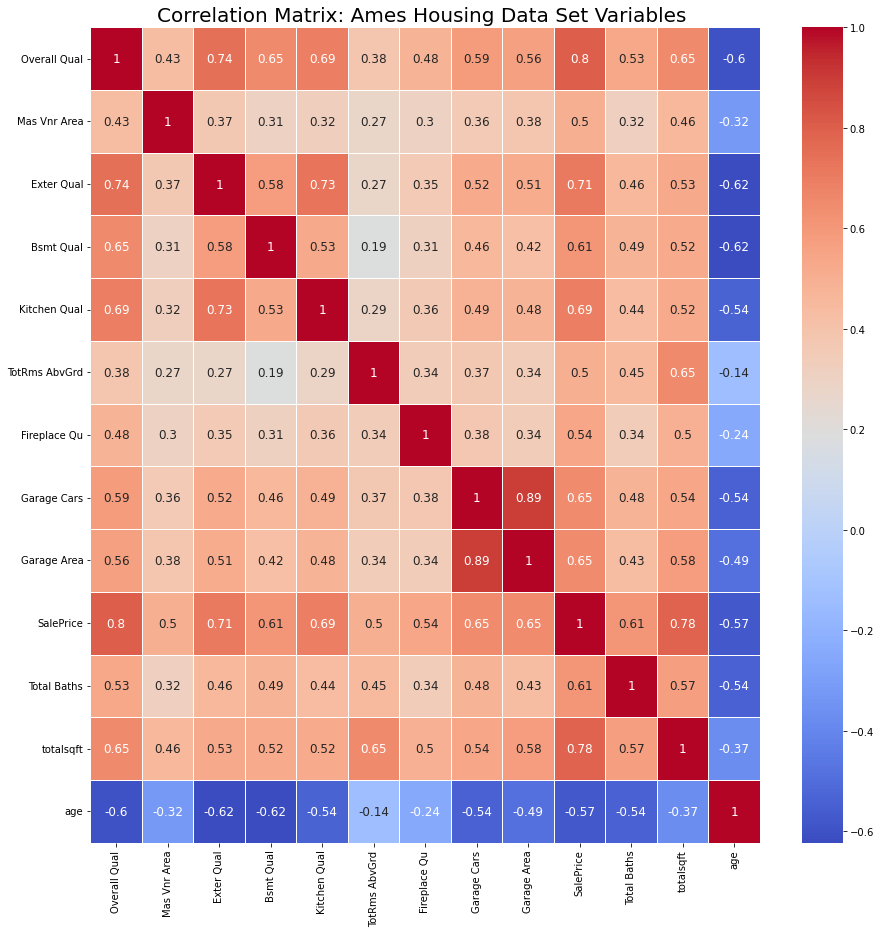

In [227]:
correlations = housing_train.corr()['SalePrice'][abs(housing_train.corr()['SalePrice']) >= .5]
corr_list = [x for x in correlations.index]

fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(housing_train[corr_list].corr(), annot=True, linewidths=1, cmap="coolwarm", annot_kws={"size": 12})
ax.set_title('Correlation Matrix: Ames Housing Data Set Variables ', fontsize=20)

## Summary of correlation
- Top features that have a strong correlation to salesprice are Overall Qual, totalsqft, Exter Qual,Kitchen Qual, Garage Area,Garage Cars,Bsmt Qual,Total Baths, Fireplace Qu, TotRms AbvGrd, Mas Vnr Area, age

- Garage Cars and Garage Area is high correlation of 0.89. There is only need to retain one of the variable. I retained Garage Cars as people can easily relate to no of garage cars the garage can accomodate rather than the area.

In [228]:
# Read 'test' dataset statistics 
housing_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,age
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.00000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,106.115034,3.379271,3.084282,...,0.050114,0.08656,0.018223,0.045558,0.043280,0.059226,0.014806,0.027335,0.007973,51.507973
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,187.086530,0.559670,0.369540,...,0.218304,0.28135,0.133834,0.208644,0.203603,0.236181,0.120846,0.163150,0.088984,30.395895
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,0.000000,3.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.250000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,0.000000,3.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,171.750000,4.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,1378.000000,5.000000,5.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,142.000000


#### Exploring Sale price

- Analysing the predictors and response

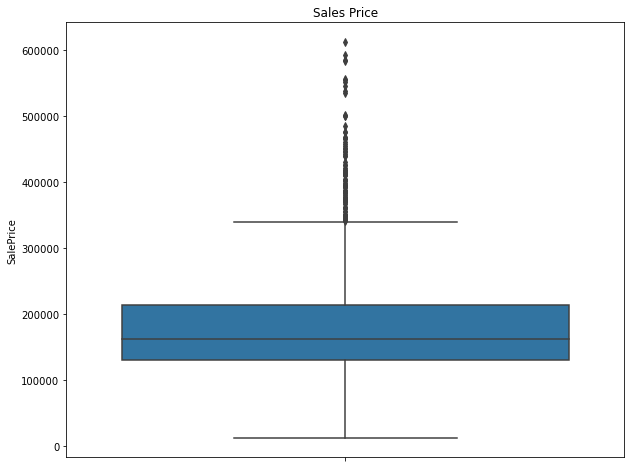

Median price: $162500.00
Mean price: $181469.70


In [229]:
# Plot boxplot for price column
plt.subplots(figsize=(10,8))
plt.title("Sales Price")
ax = sns.boxplot(y=housing_train["SalePrice"])
median_price = housing_train["SalePrice"].median()
mean_price = housing_train["SalePrice"].mean()
plt.show()
print("Median price: ${:.2f}".format(median_price))
print("Mean price: ${:.2f}".format(mean_price))

Boxplot of Age against price

Median price: $162500.00
Mean price: $181469.70


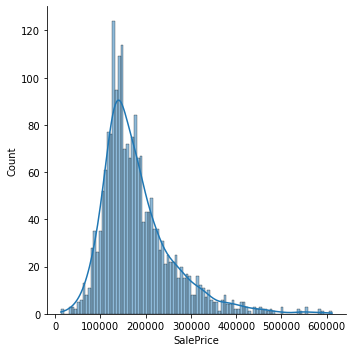

In [230]:
median_val = housing_train["SalePrice"].median()
mean_val = housing_train["SalePrice"].mean()
sns.displot(housing_train['SalePrice'],bins=100,kde=True)
print("Median price: ${:.2f}".format(median_val))
print("Mean price: ${:.2f}".format(mean_val))

Median price is S162,500.00
Mean price is $181,469.70
There are a lot of outliers in the Sale Price. I recommend not to remove the outliers. Instead, I perform logarithmic transformation of the Sale Price to make it more normalised

Median price: $162500.00
Mean price: $181469.70


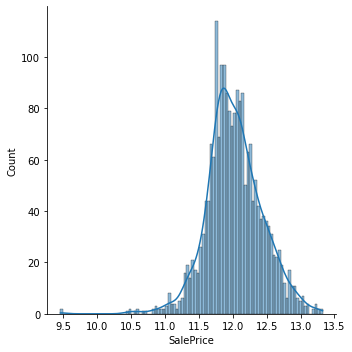

In [231]:
median_val = housing_train["SalePrice"].median()
mean_val = housing_train["SalePrice"].mean()
sns.displot(np.log(housing_train['SalePrice']),bins=100,kde=True)
print("Median price: ${:.2f}".format(median_val))
print("Mean price: ${:.2f}".format(mean_val))

#### Exploring Age against Sale Price

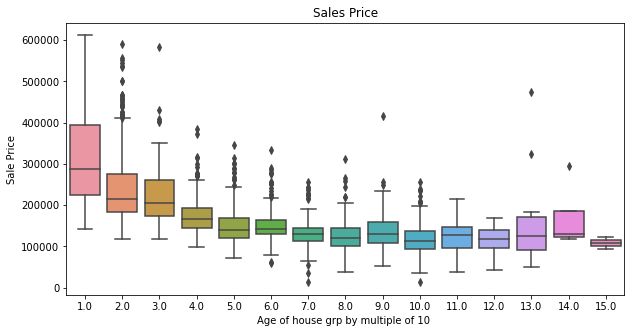

In [232]:
housing_train_grp= housing_train
housing_train_grp['age_cat']=round(housing_train['age']/10)
housing_train_grp

plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train_grp["age_cat"], y=housing_train["SalePrice"])
ax.set(xlabel='Age of house grp by multiple of 10 ',ylabel='Sale Price')
plt.show()





C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


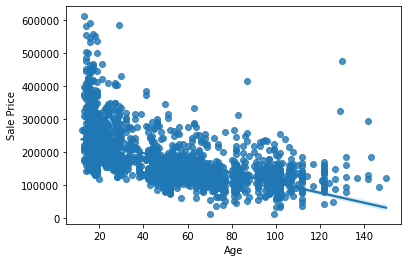

In [233]:
ax=sns.regplot(housing_train_grp['age'],housing_train['SalePrice'])
ax.set(xlabel='Age', ylabel='Sale Price')
plt.show()

Defined the age of the building as the year of sale minus the year of construction. New houses have a price premium that declines as they age even by one or two years. After a while the effect of age plateaus off, only to come back for very old houses. There is some outliers for houses age beyond 140 years of Sale Price.  I removed these outliers.

In [234]:
housing_train.drop(housing_train[(housing_train['age']>140) & (housing_train['SalePrice']>=250000)].index, inplace=True)
housing_train.drop(housing_train[(housing_train['age']>=129) & (housing_train['SalePrice']>=325000)].index, inplace=True)

housing_train.to_csv('datasets/housing_train.csv')

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


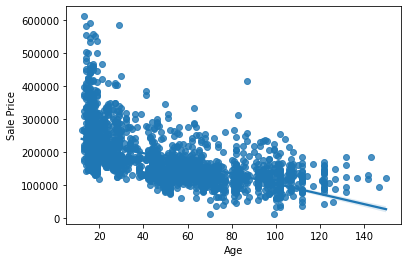

In [235]:
ax=sns.regplot(housing_train_grp['age'],housing_train['SalePrice'])
ax.set(xlabel='Age', ylabel='Sale Price')
plt.show()

Above plot confirms that the key outliers are removed

#### Exploring Overall Qual against Sale Price

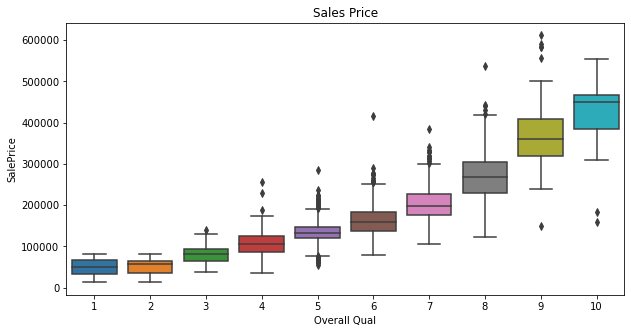

In [236]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Overall Qual"], y=housing_train["SalePrice"])
plt.show()

Sale Price increases with increase in Overall Qual

#### Exploring Area against Sale Price

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


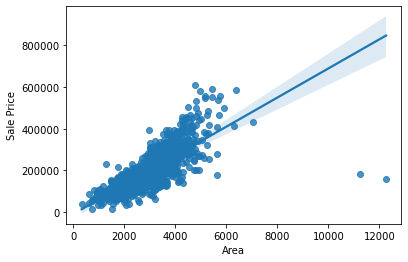

In [237]:
ax=sns.regplot(housing_train_grp['totalsqft'],housing_train['SalePrice'])
ax.set(xlabel='Area', ylabel='Sale Price')
plt.show()

Based on above plot, there are 2 outliers for area beyond 11,000. I proceeded to remove the outliers.

In [238]:
housing_train.drop(housing_train[(housing_train['totalsqft']>=11000)].index, inplace=True)
housing_train.to_csv('datasets/housing_train.csv')

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


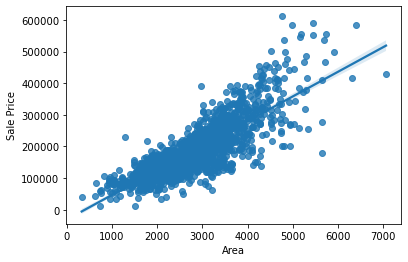

In [239]:
ax=sns.regplot(housing_train_grp['totalsqft'],housing_train['SalePrice'])
ax.set(xlabel='Area', ylabel='Sale Price')
plt.show()

Above plot confirms the outliers are removed

#### Exploring Overall Quality against Sale Price
-   Overall Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices. 

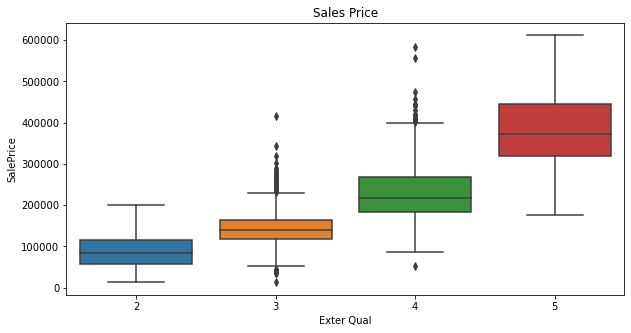

In [240]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Exter Qual"], y=housing_train["SalePrice"])
plt.show()

#### Exploring External Quality against Sale Price
-   External Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices. 

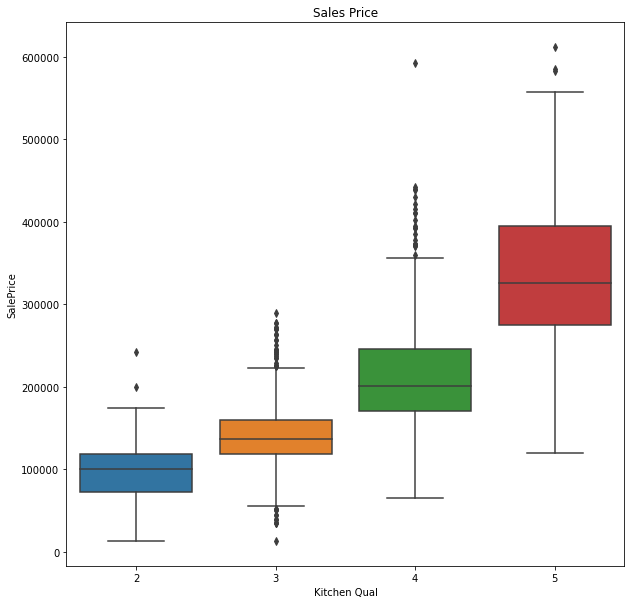

In [241]:
plt.subplots(figsize=(10,10))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Kitchen Qual"], y=housing_train["SalePrice"])
plt.show()

#### Exploring Kitchen Quality against Sale Price
-   Kitchen Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices.

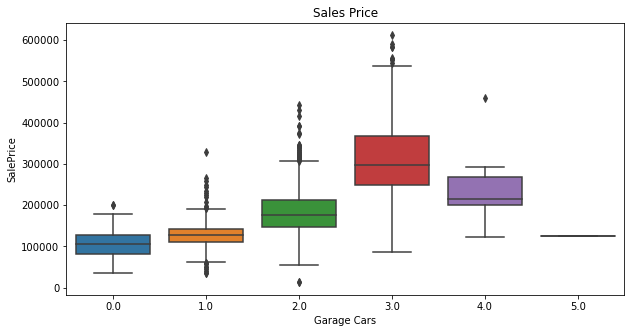

In [242]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Garage Cars"], y=housing_train["SalePrice"])
plt.show()

#### Exploring Garage Cars against Sale Price
-   Sale Price increases with the increase in garage cars. Once it reaches 4 Garage cars, the increase in price drops instead of increase.

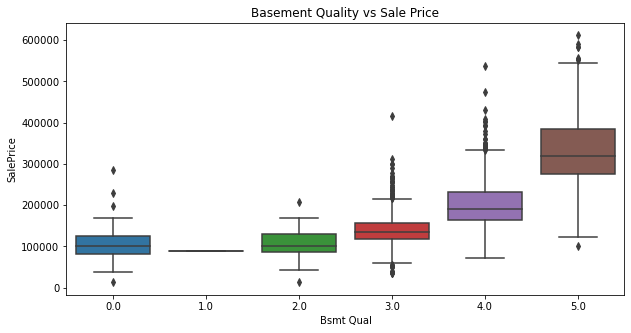

In [243]:
plt.subplots(figsize=(10,5))
plt.title("Basement Quality vs Sale Price")
ax = sns.boxplot(x=housing_train["Bsmt Qual"], y=housing_train["SalePrice"])
plt.show()

#### Exploring Bsmt Quality wrt Sale Price
-   Sale Price increases with the increase in Basement Quality. 

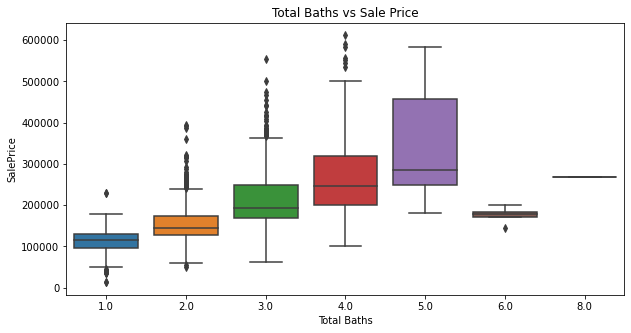

In [244]:
plt.subplots(figsize=(10,5))
plt.title("Total Baths vs Sale Price")
ax = sns.boxplot(x=housing_train["Total Baths"], y=housing_train["SalePrice"])
plt.show()

#### Exploring No of Baths wrt Sale Price
-   Sale Price increases with the increase in no of baths. When it is beyond 5, it will not have effect on the price

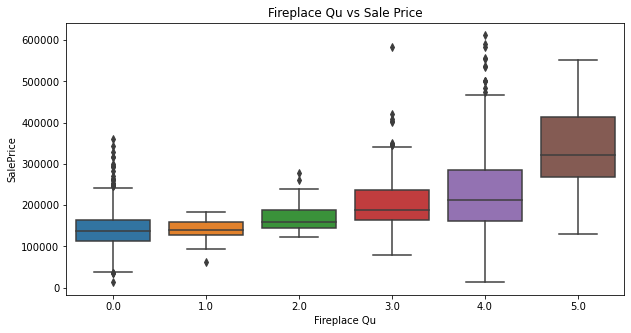

In [245]:
plt.subplots(figsize=(10,5))
plt.title("Fireplace Qu vs Sale Price")
ax = sns.boxplot(x=housing_train["Fireplace Qu"], y=housing_train["SalePrice"])
plt.show()

#### Exploring Fireplace Quality wrt Sale Price
-   Sale Price increases with the increase in fireplace quality. 

array([[<AxesSubplot:title={'center':'TotRms AbvGrd'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>]], dtype=object)

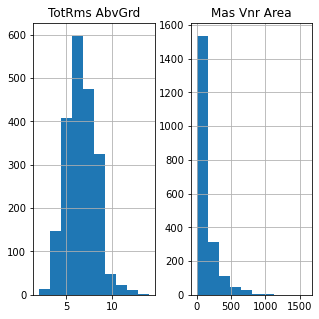

In [246]:
housing_train_hist = housing_train[[ 'TotRms AbvGrd','Mas Vnr Area']]

housing_train_hist.hist(figsize=(5,5))

#  4- Modelling

#### Summary of Data Preparation
- All the missing data is rectified.
- Those fields (Fireplaces, BsmtFin SF 1,Open Porch SF, Wood Deck SF, Lot Area,Bsmt Full Bath,Half Bath, Garage Yr Blt,2nd Flr SF,Bsmt Unf SF,Lot Frontage,Bedroom AbvGr,Screen Porch,3Ssn Porch,Pool Area,BsmtFin SF 2,Misc Val,Low Qual Fin SF,Bsmt Half Bath, MS SubClass, Overall Cond, Kitchen AbvGr, Enclosed Porch,PID ) with correlation <0.5 which is below moderate are dropped
- Year Remod/Add','Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath','Garage Finish', 'Garage Yr Blt', 'Garage Type','Pool QC','Fence','Paved Drive','Central Air','current_year', 'Year Built', 'Mo Sold', 'Yr Sold' are dropped
- Garage Area is dropped as it has high correlation factor with Garage Car
- id column will be dropped as it is a running sequence.

## Split data to train and test set

In [247]:
X = housing_train[['Overall Qual', 'totalsqft','Exter Qual','Kitchen Qual','Garage Cars',
                   'Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd','Mas Vnr Area', 'age']]
y= np.log(housing_train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

## Baseline Model

- Variables used in the baseline model are Overall Qual, totalsqft, Exter Qual, Kitchen Qual,Garage Cars, Bsmt Qual,Total Baths,Fireplace Qu,TotRms AbvGrd,Mas Vnr Area, age
- Model used is Linear Regression

#### Fit Model with: Linear Regression Model Degree 1

In [248]:
# Fit the Training Set
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


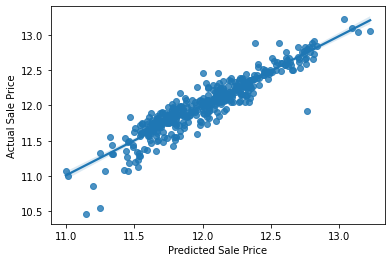

In [249]:
ax=sns.regplot(lr.predict(X_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Linear Regression Model

In [250]:
#Training Set
print('Linear Regression Train MSE',metrics.mean_squared_error(y_train,lr.predict(X_train)))
predict_X_test= lr.predict(X_test)
print('Linear Regression Test MSE',metrics.mean_squared_error(y_test,predict_X_test))

Linear Regression Train MSE 0.023862165669055902
Linear Regression Test MSE 0.02267001237644348


In [251]:
cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.024425979399376678

In [252]:
residuals=y_test- predict_X_test

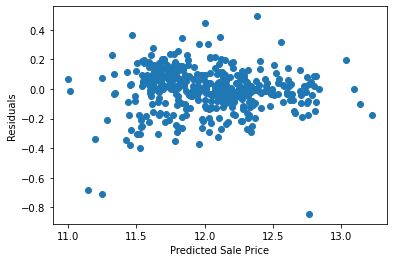

In [253]:
plt.scatter(lr.predict(X_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

-  Variables used are 'Overall Qual', 'totalsqft','Exter Qual','Kitchen Qual','Garage Cars', 'Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd','Mas Vnr Area', 'age'
- This will be my baseline model. MSE Train is 0.023862165669055902. MSE Test is 0.02267001237644348. CVS is 0.024425979399376678
- There is room for improvement. We try to see which are the predictors which are significant.

#### To find out which are the predictors to add/remove

In [254]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()


C:\Anaconda3\envs\dsi1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1137.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:40:45   Log-Likelihood:                 930.56
No. Observations:                2046   AIC:                            -1837.
Df Residuals:                    2034   BIC:                            -1770.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.6469      0.037    284.024      0.000      10.573      10.720
Overall Qual      0.0775      0.005     17.027      0.000       0.069       0.086
totalsqft         0.0002   7.48e-06     24.442      0.000       0.000       0.000
Exter Qual        0.0150      0.010      1.489      0.137      -0.005       0.035
Kitchen Qual      0.0590      0.008      7.359      0.000       0.043       0.075
Garage Cars       0.0486      0.006      7.947      0.000       0.037       0.061
Bsmt Qual         0.0062      0.006      1.099      0.272      -0.005       0.017
Total Baths       0.0356      0.005      7.056      0.000       0.026       0.045
Fireplace Qu      0.0180      0.002      7.931      0.000       0.014       0.022
TotRms AbvGrd     0.0017      0.003      0.565      0.572      -0.004       0.008
Mas Vnr Area   1.352e-05   2.27e-05      0.595      0.552    -3.1e-05     5.8e-05
age              -0.0018      0.000    -10.194      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1163.713   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32250.681
Skew:                          -2.146   Prob(JB):                         0.00
Kurtosis:                      21.970   Cond. No.                     3.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P Value of 'TotRms AbvGrd', 'Mas Vnr Area','Exter Qual','Bsmt Qual'  are more than 0.05 which is not significant. I decide to remove these features from the model. 

In [255]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu', 'age']]
y= np.log(housing_train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

In [256]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()

C:\Anaconda3\envs\dsi1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1787.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:40:45   Log-Likelihood:                 928.54
No. Observations:                2046   AIC:                            -1841.
Df Residuals:                    2038   BIC:                            -1796.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6850      0.031    348.786      0.000      10.625      10.745
Overall Qual     0.0810      0.004     19.353      0.000       0.073       0.089
totalsqft        0.0002   6.26e-06     29.890      0.000       0.000       0.000
Kitchen Qual     0.0640      0.007      8.750      0.000       0.050       0.078
Garage Cars      0.0490      0.006      8.074      0.000       0.037       0.061
Total Baths      0.0360      0.005      7.303      0.000       0.026       0.046
Fireplace Qu     0.0179      0.002      7.926      0.000       0.013       0.022
age             -0.0019      0.000    -11.829      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     1151.389   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31383.760
Skew:                          -2.119   Prob(JB):                         0.00
Kurtosis:                      21.713   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Split data to train and test set

####  I have log-transform the Sale Price instead of removing the outliers as there are too many outliers. If I simply remove the outliers, it will affect the prediction of the values.

In [257]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu', 'age']]
y= np.log(housing_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

## Model 1 
- Variables used are : Overall Qual, totalsqft, Kitchen Qual, Garage Cars, Total Baths, Fireplace Qu, age. I removed the variable Bsmt Qual TotRms AbvGrd, Mas Vnr Area and Exter Qual from the previous baseline model. This model will be fitted to Linear Regression, Ridge Regression and Lasso Regression  
- 


- Fit Model 1 with: Linear Regression Model Degree 1

In [258]:
# Fit the Training Set
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


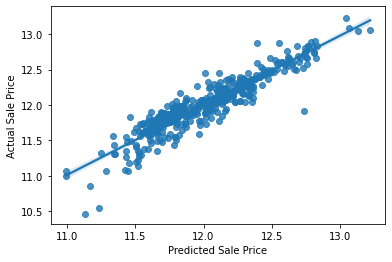

In [259]:
ax=sns.regplot(lr.predict(X_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


- Score Model and Evaluate Model with: Linear Regression Model

In [260]:
#Training Set
print('Linear Regression Train MSE',metrics.mean_squared_error(y_train,lr.predict(X_train)))
predict_X_test= lr.predict(X_test)
print('Linear Regression Test MSE',metrics.mean_squared_error(y_test,predict_X_test))

Linear Regression Train MSE 0.023926949832131658
Linear Regression Test MSE 0.022589880655978015


In [261]:
cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.024279238164378304

In [262]:
residuals=y_test- predict_X_test

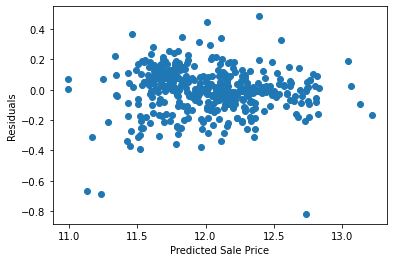

In [263]:
plt.scatter(predict_X_test, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


Train MSE 0.023926949832131658 and Test MSE 0.022589880655978015. CVS score is 0.024279238164378304. There is some improvement in the CVS score after I removed the not significant features.

#### Fit Model 1 with: RidgeCV Model

In here, we are using Ridge regression.In the correlation matrix, we see a number of features with high multi-colinearity. It performs better in cases where there may be high multi-colinearity, or high correlation between certain features.

In [264]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


In [265]:
# Fit model using best ridge alpha!
r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv = ridge_cv.fit(Z_train, y_train)


In [266]:
ridge_cv.alpha_

9.111627561154892

#### Fit Model with: Ridge Model with optimal alpha

In [267]:
# Fit model using best ridge alpha!
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge = ridge.fit(Z_train, y_train)


C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


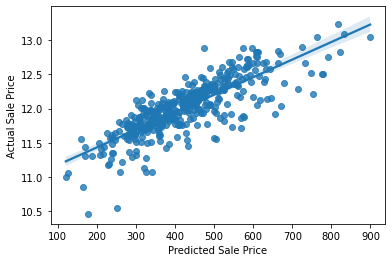

In [268]:
ax=sns.regplot(ridge.predict(X_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Ridge Regression Model

In [269]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge.predict(Z_train)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge.predict(Z_test)))


Ridge Regression Train MSE 0.02392817964988823
Ridge Regression Test MSE 0.02258433059028586


In [270]:
cross_val_score(
    ridge,
    Z_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.02427708430597085

In [271]:
residuals = y_test - ridge.predict(Z_test)

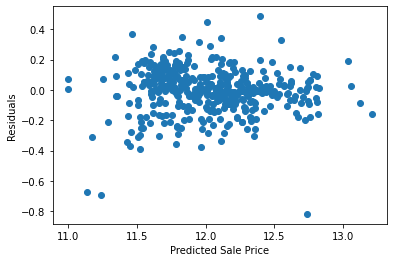

In [272]:
plt.scatter(ridge.predict(Z_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


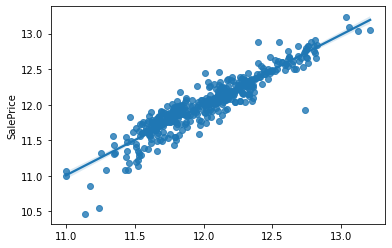

In [273]:
sns.regplot(ridge.predict(Z_test),y_test)
plt.show()

Variables used are OverallQual, totalsqft,  Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age
Ridge Regression Degree 1 using alpha=9.111627561154892
MSE Train is 0.02392817964988823 and MSE Test is 0.02258433059028586 and CVS is 0.02427708430597085. There is improvement in the CVS score compared to Linear Regression.



|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|---|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|





#### Fit Model with: LassoCV Model

In [274]:
# Fit model using best lasso alpha!
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
lasso_cv = lasso_cv.fit(Z_train, y_train)


In [275]:
lasso_cv.alpha_

0.001

#### Fit Model with: Lasso Model with optimal alpha

In [276]:
# Fit model using best alpha!
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso = lasso.fit(Z_train, y_train)

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


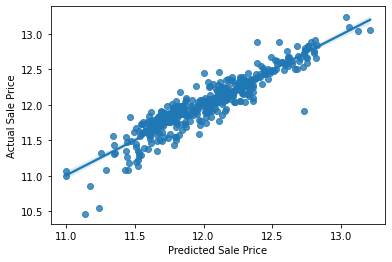

In [277]:
ax=sns.regplot(lasso.predict(Z_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Lasso Regression Mode

In [278]:
#Training Set
print('Lasso Regression Train MSE',metrics.mean_squared_error(y_train,lasso.predict(Z_train)))
print('Lasso Regression Test MSE',metrics.mean_squared_error(y_test,lasso.predict(Z_test)))


Lasso Regression Train MSE 0.02392882548841778
Lasso Regression Test MSE 0.02258909916851307


In [279]:
cross_val_score(
    lasso,
    Z_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.024281318674783132

In [280]:
residuals = y_test - lasso.predict(Z_test)

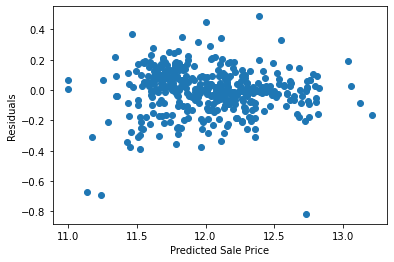

In [281]:
plt.scatter(lasso.predict(Z_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


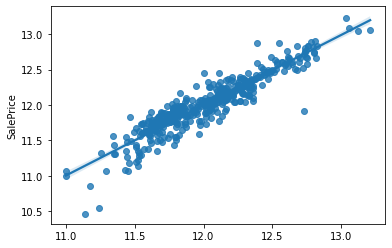

In [282]:
sns.regplot(lasso.predict(Z_test),y_test)
plt.show()

In [283]:
lasso.coef_

array([ 0.11935573,  0.15610474,  0.04457111,  0.03958906,  0.03477816,
        0.03080245, -0.05007875])

- Variables used are OverallQual, totalsqft,  Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age
- MSE Train is0.02392882548841778 and MSE Test is 0.02258909916851307 and CVS is 0.024281318674783132.CVS score for Lasso is not as good as Ridge Regression Degree 1.


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|---|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|



- Examine Whether features to be included or removed. A pairplot has of the variables are being plotted.

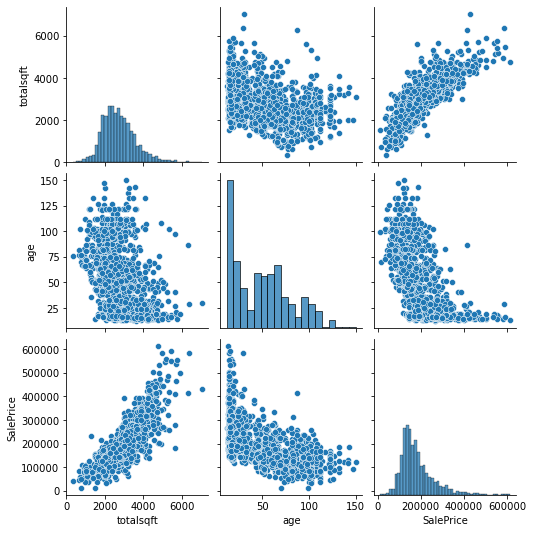

In [284]:
pp = sns.pairplot(data=housing_train,
                  x_vars=['totalsqft','age','SalePrice'],
                  y_vars=['totalsqft','age','SalePrice'])



- On visualizing the above pairplot (SalePrice versus totalsqft) in a graph, we see that the data is non-linear in nature. In other words, as the totalsqft increases, the SalePrice increases at a higher rate thus giving us a curve as shown above

- On visualizing the pairplot of (SalePrice versus age), we see that as age decreases, the SalePrice decreases at a higher rate, also giving a curve as shown above.

- Thus, we can consider applying Polynomial Regression model to get a relationship between the variables

## Model 2
Variables used are Overall Qual, totalsqft, Kitchen Qual, Garage Cars, Total Baths, Fireplace Qu, age., similar to model 1 but with Polynomial Degree 2. This model will be fitted to Linear Regression, Ridge Regression and Lasso Regression


#### Fit Model 2 with: Linear Regression Model Degree 2

In [285]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly2 = poly.fit_transform(X_train)
X_poly2_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y_train) 

   

LinearRegression()

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


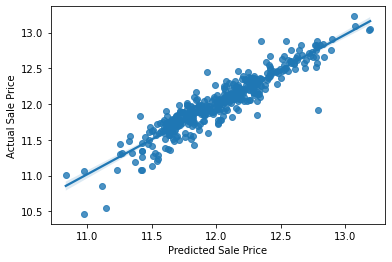

In [286]:
ax=sns.regplot(poly2_model.predict(X_poly2_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


#### Score Model and Evaluate Model with: Linear Regression Model Degree 2

In [287]:
# predicting on training data-set
poly2_y_train_predict = poly2_model.predict(X_poly2)
    
# predicting on test data-set
poly2_y_test_predict = poly2_model.predict(X_poly2_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly2_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly2_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))


MSE of training set is 0.02192103
MSE of test set is 0.02200216


In [288]:
cross_val_score(
    poly2_model,
    X_poly2,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.024460194133659883

In [289]:
residuals=y_test- poly2_y_test_predict

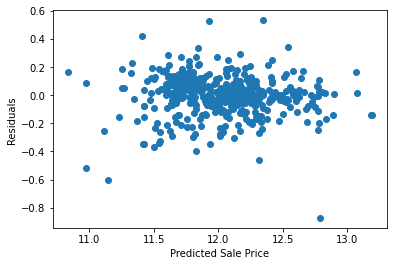

In [290]:
plt.scatter(poly2_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


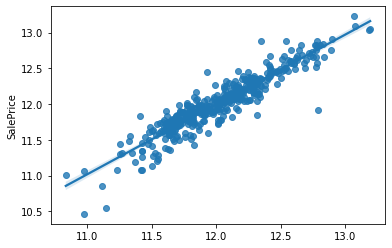

In [291]:
sns.regplot(poly2_y_test_predict,y_test)
plt.show()


- Variables used are Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars','Bsmt Qual', 'Total Baths','Fireplace Qu','TotRms AbvGrd', 'age'
- MSE Train is 0.02192103 and MSE Test is 0.02200216 and CVS is 0.024460194133659883.CVS score for Linear Regression Degree 2 is better than baseline model.


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|---|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|---|
|Linear Regression|1|0.02192103|0.02200216|0.024460194133659883|---|

Re-examine the correlation of the Degree 2 variables
Variables used are Overall Qual, totalsqft, Kitchen Qual, 
Garage Cars, Total Baths, Fireplace Qu, age

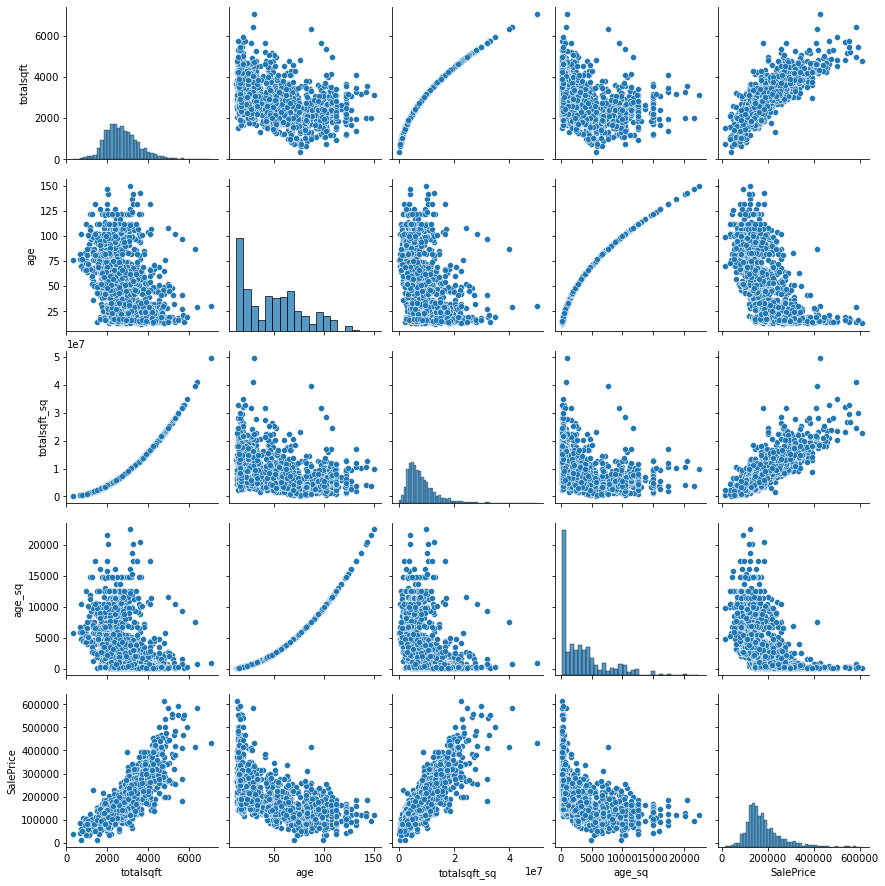

In [292]:
housing_train_poly2=housing_train
housing_train_poly2['Overall Qual_sq']=housing_train_poly2['Overall Qual']*housing_train_poly2['Overall Qual']
housing_train_poly2['totalsqft_sq']=housing_train_poly2['totalsqft']*housing_train_poly2['totalsqft']
housing_train_poly2['Kitchen Qual_sq']=housing_train_poly2['Kitchen Qual']*housing_train_poly2['Kitchen Qual']
housing_train_poly2['Garage Cars_sq']=housing_train_poly2['Garage Cars']*housing_train_poly2['Garage Cars']
housing_train_poly2['Total Baths_sq']=housing_train_poly2['Total Baths']*housing_train_poly2['Total Baths']
housing_train_poly2['Fireplace Qu_sq']=housing_train_poly2['Fireplace Qu']*housing_train_poly2['Fireplace Qu']
housing_train_poly2['age_sq']=housing_train_poly2['age']*housing_train_poly2['age']


pp = sns.pairplot(data=housing_train_poly2,
                  x_vars=['totalsqft','age','totalsqft_sq','age_sq','SalePrice'],
                  y_vars=['totalsqft','age','totalsqft_sq','age_sq','SalePrice'])

Based on the pairplot for Degree 2 variables, we see that variable age is not a curve with respect to Sale Price. So, next model is to try to remove age from the Degree 2 model and see whether it improves

#### Fit Model with: RidgeCV Model Degree=2

In [293]:
# Creates a polynomial ridge regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_ridge_poly2 = poly.fit_transform(Z_train)
X_test_ridge_poly2 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly2_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly2_cv = ridge_poly2_cv.fit(X_train_ridge_poly2, y_train)


In [294]:
ridge_poly2_cv.alpha_

65.79332246575679

#### Fit Model with: Ridge Model Degree=2 with optimal alpha

In [295]:
# Fit model using best alpha!
ridge_poly2 = Ridge(alpha=ridge_poly2_cv.alpha_)
ridge_poly2 = ridge_poly2.fit(X_train_ridge_poly2, y_train)



In [296]:
ridge_poly2_cv.alpha_

65.79332246575679

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


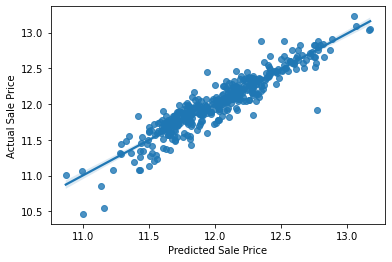

In [297]:
ax=sns.regplot(ridge_poly2.predict(X_test_ridge_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Ridge Regression Model Degree 2

In [298]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly2.predict(X_train_ridge_poly2)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly2.predict(X_test_ridge_poly2)))

Ridge Regression Train MSE 0.022023794923807127
Ridge Regression Test MSE 0.021761534481688397


In [299]:
cross_val_score(
    ridge_poly2,
    X_train_ridge_poly2,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'  
).mean()

-0.024241644882198758

In [300]:
residuals = y_test - ridge_poly2.predict(X_test_ridge_poly2)

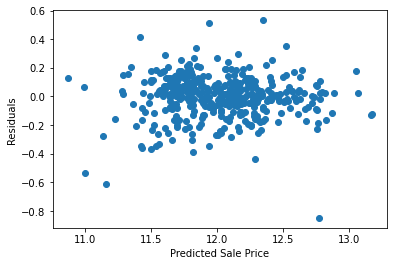

In [301]:
plt.scatter(ridge_poly2.predict(X_test_ridge_poly2), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


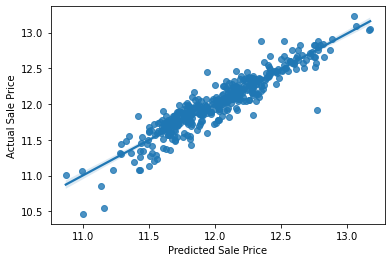

In [302]:
ax=sns.regplot(ridge_poly2.predict(X_test_ridge_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

- Variables used are OverallQual, totalsqft,  Kitchen Qual,Garage Cars, Total Bathes, Fireplace Qu, age
- MSE Train is 0.022023794923807127 and MSE Test is 0.021761534481688397 and CVS is 0.024241644882198758.CVS score for Ridge Regression Degree 2 alpha=65.79332246575679 is better than previous models.


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|---|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|---|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|



#### Fit Model with: Lasso Model Degree 2

In [303]:
# Creates a polynomial lasso regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_lasso_poly2 = poly.fit_transform(Z_train)
X_test_lasso_poly2 = poly.transform(Z_test)

r_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of lasso alphas.
lasso_poly2_cv = LassoCV(alphas=r_alphas, cv=5)
lasso_poly2_cv = lasso_poly2_cv.fit(X_train_lasso_poly2, y_train)

In [304]:
lasso_poly2_cv.alpha_

0.003511191734215131

#### Fit Model with: Lasso Model Degree 2 with optimal alpha

In [305]:
# Fit model using best alpha!
lasso_poly2 = Lasso(alpha=lasso_poly2_cv.alpha_)
lasso_poly2 = lasso_poly2.fit(X_train_lasso_poly2, y_train)

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


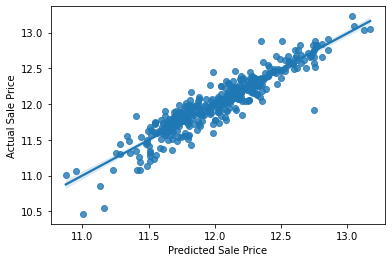

In [306]:
ax=sns.regplot(lasso_poly2.predict(X_test_lasso_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Lasso Degree 2 Regression Mode

In [307]:
#Training Set
print('Lasso Regression Train MSE',metrics.mean_squared_error(y_train,lasso_poly2.predict(X_train_lasso_poly2)))
print('Lasso Regression Test MSE',metrics.mean_squared_error(y_test,lasso_poly2.predict(X_test_lasso_poly2)))


Lasso Regression Train MSE 0.022539032281693936
Lasso Regression Test MSE 0.02185415307219567


In [308]:
cross_val_score(
    lasso_poly2,
    X_train_lasso_poly2,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.02399888774648144

In [309]:
residuals = y_test - lasso_poly2.predict(X_test_lasso_poly2)

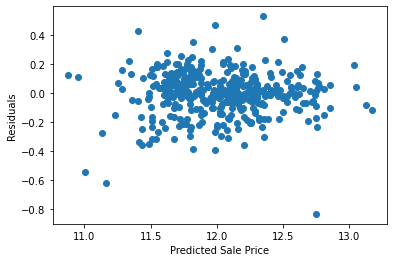

In [310]:
plt.scatter(lasso_poly2.predict(X_test_lasso_poly2), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- There is random distribution of the residue.

In [311]:
lasso_poly2.coef_

array([ 0.        ,  0.1153514 ,  0.15942768,  0.05142897,  0.04672644,
        0.03480756,  0.02662295, -0.03434349, -0.01663578,  0.        ,
       -0.        ,  0.01634179,  0.        ,  0.00732824,  0.0161786 ,
       -0.00420702,  0.00847482, -0.        ,  0.        ,  0.00160369,
       -0.        , -0.        ,  0.        ,  0.00196316, -0.        ,
        0.00246081, -0.00436064, -0.00047248, -0.        ,  0.00166476,
       -0.00208314, -0.        , -0.        , -0.        ,  0.00019434,
       -0.0070535 ])

- Variables used are OverallQual, totalsqft,  Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age
- Lasso Regression Degree 2 alpha=0.0037649358067924675
- MSE Train is 0.022539032281693936 and MSE Test is 0.02185415307219567 and CVS is 0.02399888774648144.CVS score for Lasso Regression Degree 2 with alpha=0.003511191734215131 is better than previous models.


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|---|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|---|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|
|Lasso Regression|2|0.022539032281693936|0.02185415307219567|0.02399888774648144|---|


## Model 3
I have removed the variable Age from Degree 2 model as the earlier plot demonstrates that the square of age against Sale Price is not linear. Variables used are Overall Qual, totalsqft, Kitchen Qual, Garage Cars, Total Baths, Fireplace Qu with Degree 2
This model will be fitted to Linear Regression, Ridge Regression, Lasso Regression.

#### Fit with Linear Regression Degree 2

In [312]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu']]
y= np.log(housing_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [313]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly22 = poly.fit_transform(X_train)
X_poly22_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly22_model = LinearRegression()
poly22_model.fit(X_poly22, y_train) 

LinearRegression()

In [314]:
# predicting on training data-set
poly22_y_train_predict = poly22_model.predict(X_poly22)
    
# predicting on test data-set
poly22_y_test_predict = poly22_model.predict(X_poly22_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly22_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly22_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))

MSE of training set is 0.02319557
MSE of test set is 0.02419273


In [315]:
cross_val_score(
    poly22_model,
    X_poly22,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.025086988660436578

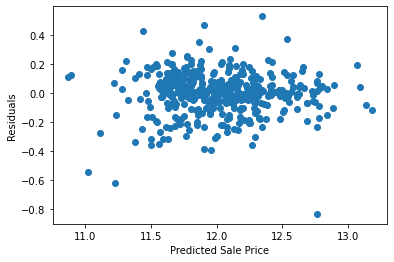

In [316]:
plt.scatter(poly22_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


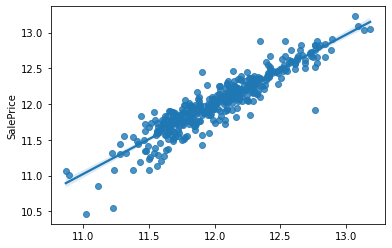

In [317]:
sns.regplot(poly22_y_test_predict,y_test)
plt.show()


#### Fit with Ridge Regression Degree 2

In [318]:
# Creates a polynomial ridge regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_ridge_poly22 = poly.fit_transform(Z_train)
X_test_ridge_poly22 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly22_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly22_cv = ridge_poly22_cv.fit(X_train_ridge_poly22, y_train)


In [319]:
ridge_poly22_cv.alpha_

58.570208180566674

#### Fit Model with: Ridge Model Degree=2 with optimal alpha

In [320]:
# Fit model using best alpha!
ridge_poly22 = Ridge(alpha=ridge_poly22_cv.alpha_)
ridge_poly22 = ridge_poly22.fit(X_train_ridge_poly22, y_train)



In [321]:
ridge_poly22_cv.alpha_

58.570208180566674

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


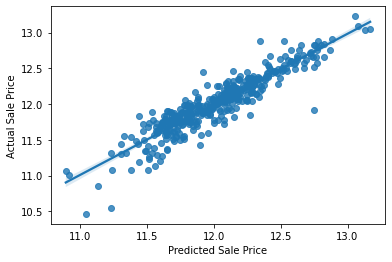

In [322]:
ax=sns.regplot(ridge_poly22.predict(X_test_ridge_poly22),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Ridge Regression Model Degree 2

In [323]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly22.predict(X_train_ridge_poly22)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly22.predict(X_test_ridge_poly22)))

Ridge Regression Train MSE 0.023268444541707595
Ridge Regression Test MSE 0.024117539956324784


In [324]:
cross_val_score(
    ridge_poly22,
    X_train_ridge_poly22,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'  
).mean()

-0.02493820700067781

In [325]:
residuals = y_test - ridge_poly22.predict(X_test_ridge_poly22)

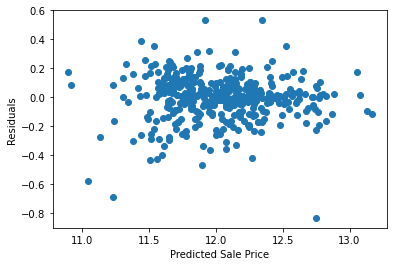

In [326]:
plt.scatter(ridge_poly22.predict(X_test_ridge_poly22), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


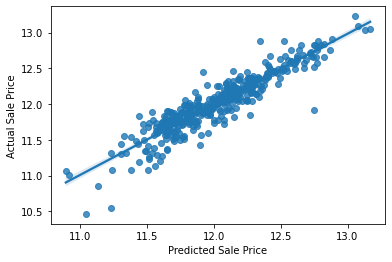

In [327]:
ax=sns.regplot(ridge_poly22.predict(X_test_ridge_poly22),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Fit Model with: Lasso Model Degree 2

In [328]:
# Creates a polynomial lasso regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_lasso_poly22 = poly.fit_transform(Z_train)
X_test_lasso_poly22 = poly.transform(Z_test)

r_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of lasso alphas.
lasso_poly22_cv = LassoCV(alphas=r_alphas, cv=5)
lasso_poly22_cv = lasso_poly22_cv.fit(X_train_lasso_poly22, y_train)

In [329]:
lasso_poly22_cv.alpha_

0.0013219411484660286

#### Fit Model with: Lasso Model Degree 2 with optimal alpha

In [330]:
# Fit model using best alpha!
lasso_poly22 = Lasso(alpha=lasso_poly22_cv.alpha_)
lasso_poly22 = lasso_poly22.fit(X_train_lasso_poly22, y_train)

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


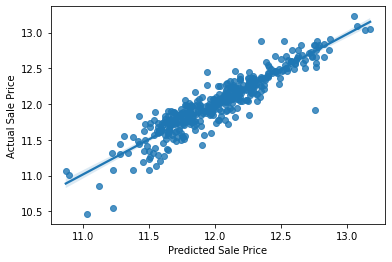

In [331]:
ax=sns.regplot(lasso_poly22.predict(X_test_lasso_poly22),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Lasso Degree 2 Regression Mode

In [332]:
#Training Set
print('Lasso Regression Train MSE',metrics.mean_squared_error(y_train,lasso_poly22.predict(X_train_lasso_poly22)))
print('Lasso Regression Test MSE',metrics.mean_squared_error(y_test,lasso_poly22.predict(X_test_lasso_poly22)))


Lasso Regression Train MSE 0.023330669785984002
Lasso Regression Test MSE 0.024226242692108962


In [333]:
cross_val_score(
    lasso_poly22,
    X_train_lasso_poly22,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.024909124969940515

In [334]:
residuals = y_test - lasso_poly22.predict(X_test_lasso_poly22)

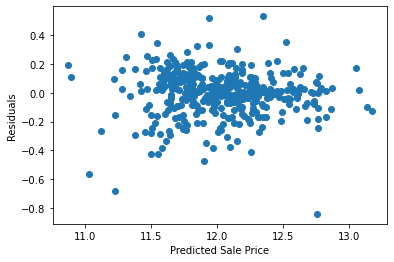

In [335]:
plt.scatter(lasso_poly22.predict(X_test_lasso_poly22), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- There is random distribution of the residue.

In [336]:
lasso_poly22.coef_

array([ 0.        ,  0.12199303,  0.15433213,  0.05876818,  0.05624343,
        0.05141874,  0.02661276, -0.03485171,  0.00871174,  0.        ,
        0.02348575,  0.00097814,  0.01489047, -0.01193692,  0.0128909 ,
       -0.0010688 ,  0.0004838 ,  0.01462429, -0.00456751,  0.00354827,
        0.00082484, -0.0058884 , -0.00717793, -0.00433124, -0.00983572,
       -0.00466069, -0.0011901 , -0.00749614])

- Variables used are OverallQual, totalsqft,  Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu
- Lasso Regression Degree 2 alpha=0.0037649358067924675
- MSE Train is 0.023330669785984002 and MSE Test is 0.024226242692108962 and CVS is 0.024909124969940515.CVS score for Lasso Regression Degree 2 with alpha=0.0013219411484660286 is worse than previous degree 2 model


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|
|Lasso Regression|2|0.022539032281693936|0.02185415307219567|0.02399888774648144|---|
|Model 3|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu|
|Linear Regression|2|0.02319557|0.02419273|0.025086988660436578|Not as good as Degree 2|
|Ridge Regression|2|0.023268444541707595|0.024117539956324784|0.02493820700067781|Not as good as Degree 2|
|Lasso Regression|2|0.023330669785984002|0.024226242692108962|0.024909124969940515|Not as good as Degree 2|

## Model 4
Variables used are Overall Qual, totalsqft, Kitchen Qual, Garage Cars, Total Baths, Fireplace Qu, age ,similar to model 2 but with Degree 3
This model will be fitted to Linear Regression, Ridge Regression.

#### Fit Model with: Linear Regression Model Degree 3

In [337]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu','age']]
y= np.log(housing_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [338]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly_3 = poly.fit_transform(X_train)
X_poly_3_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly3_model = LinearRegression()
poly3_model.fit(X_poly_3, y_train) 
   

LinearRegression()

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


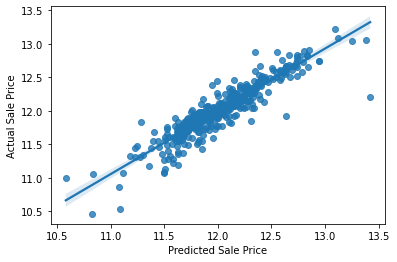

In [339]:
ax=sns.regplot(poly3_model.predict(X_poly_3_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


#### Score Model and Evaluate Model with: Linear Regression Model Degree 3

In [340]:
# predicting on training data-set
poly3_y_train_predict = poly3_model.predict(X_poly_3)
    
# predicting on test data-set
poly3_y_test_predict = poly3_model.predict(X_poly_3_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly3_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly3_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))

MSE of training set is 0.01851985
MSE of test set is 0.02644404


In [341]:
cross_val_score(
    poly3_model,
    X_poly_3,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.029948109127820262

In [342]:
residuals=y_test- poly3_y_test_predict

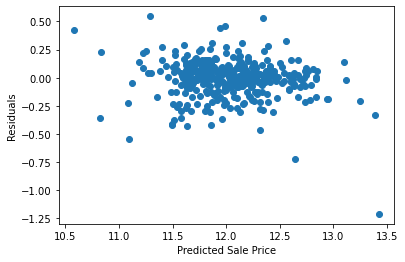

In [343]:
plt.scatter(poly3_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


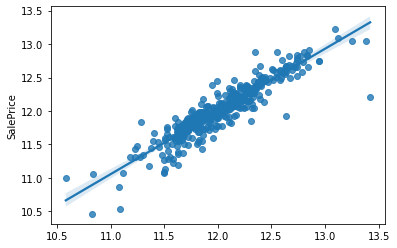

In [344]:
sns.regplot(poly3_y_test_predict,y_test)
plt.show()


- Variables used are Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars','Total Baths','Fireplace Qu','age'
- Linear Regression Degree 3 
- MSE Train is 0.01851985 and MSE Test is 0.02644404 and CVS is 0.029948109127820262 It is observed that the MSE Train starts to deviate a lot of MSE Test. CVS score for Linear Regression on Degree 3 is not better. Thus, I will not go further.


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|
|Lasso Regression|2|0.022539032281693936|0.02185415307219567|0.02399888774648144|---|
|Model 3|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu|
|Linear Regression|2|0.02319557|0.02419273|0.025086988660436578|Not as good as Degree 2|
|Ridge Regression|2|0.023268444541707595|0.024117539956324784|0.02493820700067781|Not as good as Degree 2|
|Lasso Regression|2|0.023330669785984002|0.024226242692108962|0.024909124969940515|Not as good as Degree 2|
|Model 4|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|3|0.01851985|0.02644404|0.029948109127820262|overfitting as train MSE is much lesser test MSE. Starts to deteriorate|



#### Fit Model with: RidgeCV Model Degree=3

In [345]:
# Creates a polynomial ridge regression model for degree =3
poly = PolynomialFeatures(3)

# transforms the existing features to higher degree features.
X_train_ridge_poly3 = poly.fit_transform(Z_train)
X_test_ridge_poly3 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly3_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly3_cv = ridge_poly3_cv.fit(X_train_ridge_poly3, y_train)


In [346]:
ridge_poly3_cv.alpha_

104.76157527896652

#### Fit Model with: Ridge Model Degree=3 with optimal alpha

In [347]:
# Fit model using best alpha!
ridge_poly3 = Ridge(alpha=ridge_poly3_cv.alpha_)
ridge_poly3 = ridge_poly3.fit(X_train_ridge_poly3, y_train)

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


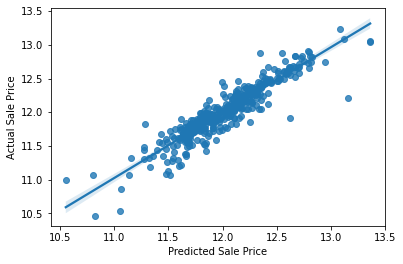

In [348]:
ax=sns.regplot(ridge_poly3.predict(X_test_ridge_poly3),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

#### Score Model and Evaluate Model with: Ridge Regression Model Degree 3

In [349]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly3.predict(X_train_ridge_poly3)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly3.predict(X_test_ridge_poly3)))

Ridge Regression Train MSE 0.019229721417379997
Ridge Regression Test MSE 0.02414408565724339


In [350]:
cross_val_score(
    ridge_poly3,
    X_train_ridge_poly3,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   
).mean()

-0.026347308615236743

In [351]:
residuals = y_test - ridge_poly3.predict(X_test_ridge_poly3)

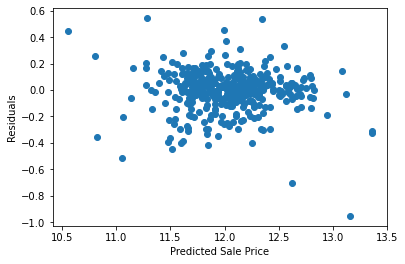

In [352]:
plt.scatter(ridge_poly3.predict(X_test_ridge_poly3), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()



- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\envs\dsi1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


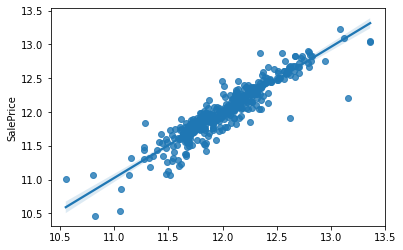

In [353]:
sns.regplot(ridge_poly3.predict(X_test_ridge_poly3),y_test)
plt.show()

- Variables used are Overall Qual', 'totalsqft','Kitchen Qual','Garage Cars','Total Baths','Fireplace Qu','age'
- Linear Regression Degree 3 
- MSE Train is 0.019229721417379997 and MSE Test is 0.02414408565724339 and CVS is 0.026347308615236743. There is overfitting as MSE train deviates from MSE Test. CVS score for Ridge Regression on Degree 3 is not better. Thus, I will not go further.

|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|---|
|Model 1|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|
|Lasso Regression|2|0.022539032281693936|0.02185415307219567|0.02399888774648144|Best Model|
|Model 3|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu|
|Linear Regression|2|0.02319557|0.02419273|0.025086988660436578|Not as good as Degree 2|
|Ridge Regression|2|0.023268444541707595|0.024117539956324784|0.02493820700067781|Not as good as Degree 2|
|Lasso Regression|2|0.023330669785984002|0.024226242692108962|0.024909124969940515|Not as good as Degree 2|
|Model 4|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|3|0.01851985|0.02644404|0.029948109127820262|overfitting as train MSE is much lesser test MSE. Starts to deteriorate|
|Ridge Regression|3|0.019229721417379997|0.02414408565724339|0.026347308615236743|overfitting as train MSE is much lesser test MSE. Starts to deteriorate|

## 5 Results of Model Training and Testing



|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Baseline Model|1|0.023862165669055902|0.02267001237644348|0.024425979399376678|Overall Qual, totalsqft,Exter Qual,Kitchen Qual,Garage Cars,Bsmt Qual,Total Baths,Fireplace Qu,TotRms AbvGrd,Mas Vnr Area,age|
|Model 1|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|1|0.023926949832131658|0.022589880655978015|0.024279238164378304|---|
|Ridge Regression|1|0.02392817964988823|0.02258433059028586|0.02427708430597085|---|
|Lasso Regression|1|0.02392882548841778|0.02258909916851307|0.024281318674783132|---|
|Model 2|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu, age|
|Linear Regression|2|0.02192103|0.02200216|0.024460194133659883|---|
|Ridge Regression|2|0.022023794923807127|0.021761534481688397|0.024241644882198758|---|
|Lasso Regression|2|0.022539032281693936|0.02185415307219567|0.02399888774648144|Best Model|
|Model 3|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu|
|Linear Regression|2|0.02319557|0.02419273|0.025086988660436578|Not as good as model 2|
|Ridge Regression|2|0.023268444541707595|0.024117539956324784|0.02493820700067781|Not as good as Degree 2|
|Lasso Regression|2|0.023330669785984002|0.024226242692108962|0.024909124969940515|Not as good as Degree 2|
|Model 4|---|---|---|---|OverallQual, totalsqft, Kitchen Qual, Garage Cars, Total Bathes, Fireplace Qu,age|
|Linear Regression|3|0.01851985|0.02644404|0.029948109127820262|overfitting as train MSE is much lesser test MSE. Starts to deteriorate|
|Ridge Regression|3|0.019229721417379997|0.02414408565724339|0.026347308615236743|overfitting as train MSE is much lesser test MSE. Starts to deteriorate|


## 6. Conclusion
I selected Model 2 Lasso Regression with alpha=0.0037649358067924675 Degree 2 as the best model. I retrain the model with the max training set. 
I then predict the SalePrice of test data using the fitted model
I saved the result to a csv 

My problem statement is to find out the predicted SalePrice of the houses on hand so that I can prepare for the coming Auction.
So, based on the MSE and CVS score, I selected the Lasso Regression Degree 2 to predict my SalePrice.
On top of it, I validated the residue plot against predicted price. The plot is random and even distributed. As for the actual value versu predicted value, it is linear and acceptable.

Although this is more complex model, areas of improvement is explained in layman term to the customers. There is no concern in using the complexed model.


In [354]:
sc = StandardScaler()

# Train data with selected features
X1a = housing_train[['Overall Qual', 'totalsqft','Exter Qual','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu','age']]
y1a = np.log(housing_train['SalePrice'])
X1a_Z = sc.fit_transform(X1a)

# Test data with selected features
T1a = housing_test[['Overall Qual', 'totalsqft','Exter Qual','Kitchen Qual','Garage Cars',
                   'Total Baths','Fireplace Qu','age']]
T1a_Z = sc.transform(T1a)

# Creates a polynomial ridge regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X2a_Z = poly.fit_transform(X1a_Z)
T2a_Z = poly.transform(T1a_Z)

model = Lasso(alpha=lasso_poly2_cv.alpha_)
model.fit(X2a_Z, y1a)

predicts = model.predict(T2a_Z)

housing_test['Id'] = pd.DataFrame(housing_test['Id'])
housing_test['SalePrice'] = np.exp(predicts)
housing_test['SalePrice'] = round(housing_test['SalePrice'],4)
print(housing_test[:5])
housing_result_2= housing_test[['Id','SalePrice']]
print(housing_result_2[:5])
housing_result_2.to_csv('datasets/housing_result_2.csv', index=False)

     Id        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  2658  902301120          190          69.0      9142             6   
1  2718  905108090           90           NaN      9662             5   
2  2414  528218130           60          58.0     17104             7   
3  1989  902207150           30          60.0      8520             5   
4   625  535105100           20           NaN      9500             6   

   Overall Cond  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0             8           0.0           3           2  ...   
1             4           0.0           3           3  ...   
2             5           0.0           4           3  ...   
3             6           0.0           4           3  ...   
4             5         247.0           3           3  ...   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     1                   0                    0   
1                     0                   0         

In [355]:
housing_test

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,age,SalePrice
0,2658,902301120,190,69.0,9142,6,8,0.0,3,2,...,1,0,0,0,0,0,0,0,112,132621.9659
1,2718,905108090,90,NaN,9662,5,4,0.0,3,3,...,0,0,1,0,0,0,0,0,45,182389.7716
2,2414,528218130,60,58.0,17104,7,5,0.0,4,3,...,0,0,0,0,0,0,0,0,16,195718.2651
3,1989,902207150,30,60.0,8520,5,6,0.0,4,3,...,1,0,0,0,0,0,0,0,99,117462.0255
4,625,535105100,20,NaN,9500,6,5,247.0,3,3,...,0,0,0,0,0,0,0,0,59,181731.0732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,80.0,8000,6,6,0.0,3,3,...,0,0,0,0,0,0,0,0,48,187914.6741
874,1234,535126140,60,90.0,14670,6,7,410.0,4,4,...,0,0,0,0,0,0,0,0,56,217317.9379
875,1373,904100040,20,55.0,8250,5,5,0.0,3,3,...,0,0,1,0,0,0,0,0,54,125873.9768
876,1672,527425140,20,60.0,9000,4,6,0.0,3,3,...,0,0,0,0,0,0,0,0,51,105312.5592


## Distribution of the predicted Sale Price 

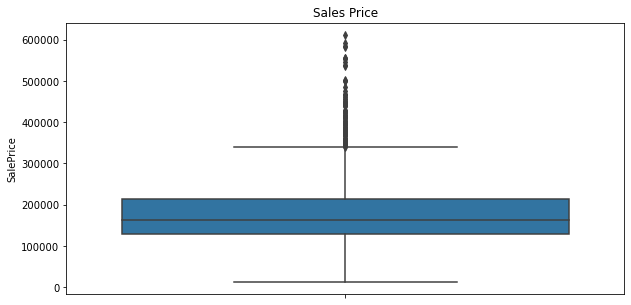

In [356]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot( y=housing_train["SalePrice"])
plt.show()

Median price: $160338.87
Mean price: $177140.03


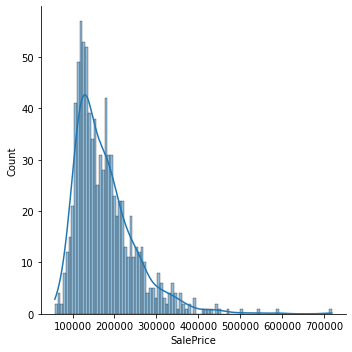

In [357]:
median_val = housing_test["SalePrice"].median()
mean_val = housing_test["SalePrice"].mean()
sns.displot(housing_test['SalePrice'],bins=100,kde=True)
print("Median price: ${:.2f}".format(median_val))
print("Mean price: ${:.2f}".format(mean_val))

## 7. Recommendation
The mean price of list of houses is $161,019.62. 
The predictors based on this price are 
- Fireplace quality is at least 3
- No of baths is at least 2
- Garage Cars is at least 2
- External Quality is at least 3
- Kitchen Quality is at least 3
- Overall Quality is at least 3

This is illustrated during the EDA section.

Certain fixed features such as area size, garage cars, no of baths of the house are fixed. To fetch a higher price, we can improve the External Quality, Kitchen Quality and Overall Quality, Fireplace Quality of the house

Futher Improvement: Research on the location of house with respect to Sale Price of house will provide a deeper understanding of the market

